## Cálculo do VaR de uma carteira de investimentos

# Entendimento do negócio

# Objetivo



Uma das técnicas utilizadas para mitigar o risco de investimentos no mercado financeiro é a VaR (Value at Risk), proposta em 1994 pelo banco JP Morgan, e essa técnica estima a maior perda esperada de uma carteira de investimentos, e para isso supõe que o risco futuro será parecido com o que foi no passado.

Essa premissa, de "o futuro repetir o passado", nem sempre é verdade, pois não se leva em consideração os eventos fora da curva, como a popularização de uma nova tecnologia, a divulgação de um escândalo envolvendo uma empresa etc. Esses eventos fora da curva são conhecidos como Cisnes Negros.

Mesmo com a possibilidade de existirem os Cisnes Negros, a metodologia do VaR continua muito utilizada no mercado financeiro. Vejamos como ela funciona:

Se uma um conjunto de ações compradas na Bolsa de Valores (carteira de investimentos) tem um VaR de 2.000 reais, a probabilidade de desvalorização dessa carteira (perda) maior que 2.000 reais será de 5% num certo período de tempo (normalmente se usa o período de 180 dias).

Dito isto, é necessário fazer a verificação se a técnica do VaR pode ser utilizada como modelo estatístico confiável para prever as perdas futuras de ativos reais listados na Bolsa de Valores.

# Premissas
Entender como e porque o modelo do VaR funciona ou não para aplicar no mercado financeiro, e se a teoria do cisne negro influencia nesse modelo.


# Descrição dos dados e coleta

Para este estudo, serão utilizados dados disponibilizados pela escola de dados Preditiva, que são dados históricos do valor de fechamento das ações de 10 empresas presentes na Bolsa de Valores: Arezzo&Co, B3, Klabin, Localiza, Lojas Americanas, Multiplan, Petrobras, Rede Atacadao, SulAmerica e Vale.

Todos os dados são reais e retirados do site https://br.financas.yahoo.com, e são entre 30/08/2019 e 27/08/2021. Vejamos:

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
baseoriginal = pd.read_excel('base_retornos_acoes (1).xlsx', header=4)
baseoriginal = baseoriginal.iloc[:,:4]
baseoriginal

,Data,Acao,Empresa,Preço_de_Fechamento
0,2021-08-27,PETR4.SA,Petrobras,28.490000
1,2021-08-27,LAME4.SA,Lojas Americanas,5.950000
2,2021-08-27,VALE3.SA,Vale,100.690002
3,2021-08-27,CRFB3.SA,Rede Atacadao,18.750000
4,2021-08-27,MULT3.SA,Multiplan,21.480000
...,...,...,...,...
4915,2019-08-30,KLBN11.SA,Klabin,15.060000
4916,2019-08-30,RENT3.SA,Localiza,44.799999
4917,2019-08-30,ARZZ3.SA,Arezzo&Co,49.480000
4918,2019-08-30,SULA11.SA,SulAmerica,44.844460


In [8]:
# Metadados:
metadados = pd.DataFrame({
'Dados':['Data','Acao','Empresa','Preço_de_Fechamento'],
'Metadados':['Data do registro','Nome da ação','Empresa a qual ação é correspondente','Valor que a ação tinha no fim da data do registro']
})
metadados

,Dados,Metadados
0,Data,Data do registro
1,Acao,Nome da ação
2,Empresa,Empresa a qual ação é correspondente
3,Preço_de_Fechamento,Valor que a ação tinha no fim da data do registro


Para deixar a visualização mais fácil, a escola dispôs o valor de fechamento das ações de cada empresa em colunas.

In [9]:
base = pd.read_excel('base_retornos_acoes (1).xlsx', header=4)
base = base.iloc[:,5:]
base.rename(columns={'Data.1':'Data'},inplace=True)
base = base.dropna(how='all')
base

,Data,Arezzo&Co,B3,Klabin,Localiza,Lojas Americanas,Multiplan,Petrobras,Rede Atacadao,SulAmerica,Vale
0,2021-08-27,92.389999,13.940000,26.719999,58.299999,5.950000,21.480000,28.490000,18.750000,29.580000,100.690002
1,2021-08-26,91.320000,13.660000,26.370001,55.959999,5.950000,21.070000,27.490000,18.450001,29.280001,98.230003
2,2021-08-25,92.629997,13.990000,26.670000,57.529999,5.810000,21.799999,27.730000,18.889999,30.000000,99.500000
3,2021-08-24,91.739998,13.900000,25.670000,57.049999,5.870000,21.930000,27.580000,18.870001,30.260000,99.709999
4,2021-08-23,90.250000,13.650000,25.170000,56.430000,5.250000,21.260000,27.020000,18.799999,29.320000,96.199997
...,...,...,...,...,...,...,...,...,...,...,...
487,2019-09-05,48.430000,15.100000,14.990000,45.000000,18.915234,26.570000,26.389999,21.860001,43.502365,46.520000
488,2019-09-04,48.090000,14.876666,15.100000,44.933334,18.975029,26.299999,26.260000,22.100000,43.317249,46.520000
489,2019-09-03,47.599998,14.583333,14.800000,44.342857,18.566427,26.040001,25.600000,22.139999,42.715618,45.520000
490,2019-09-02,48.200001,14.646666,14.970000,44.666664,18.536530,26.200001,25.299999,22.250000,44.585297,46.009998


# Análise exploratória e sanity check

Agora vamos começar a analisar os dados que temos enquanto fazemos um pouco das necessidades que o mercado tem sobre seus dados, para ficar clara a análise que fazemos.

Inicialmente, vamos analisar o comportamento das ações dia a dia, e utilizaremos o gráfico de linhas para isso.

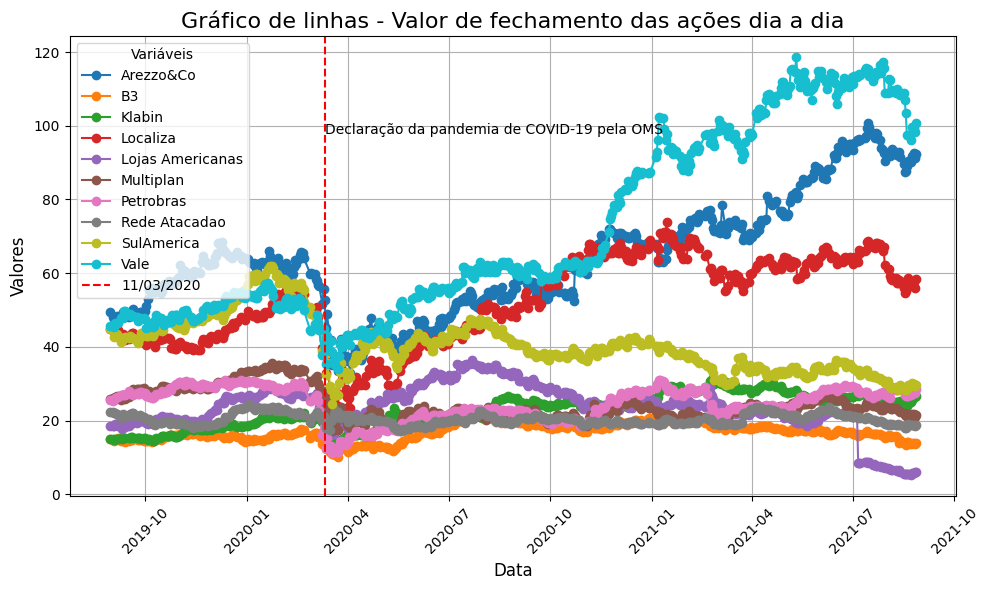

In [13]:
# Configurando o gráfico
plt.figure(figsize=(10, 6))

# Plotando as variáveis
for column in base.columns[1:]:  # Excluindo a coluna 'Data'
    plt.plot(base['Data'], base[column], marker='o', label=column)

# Adicionando uma linha vertical em 11/03/2020
data_destacada = pd.to_datetime("2020-03-11")
plt.axvline(x=data_destacada, color='red', linestyle='--', label='11/03/2020')
plt.text(x = data_destacada, y=base.iloc[:,1].max(), s='Declaração da pandemia de COVID-19 pela OMS', color='black', fontsize=10,va= 'top', ha='left')


# Personalização do gráfico
plt.title("Gráfico de linhas - Valor de fechamento das ações dia a dia", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor visualização
plt.legend(title="Variáveis", loc="best")
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Como dissemos, o gráfico acima foi montado levando em consideração o valor de fechamento das ações selecionadas dia a dia entre 30/08/2019 e 27/08/2021, um período de dois anos.

Cabe ressaltar que neste ínterim tivemos um cisne negro que atingiu todas as áreas de forma global: a pandemia de COVID-19, que foi formalmente declarada em 11/03/2020. Por isso, marcamos este evento no gráfico, e podemos ver o comportamento das ações iniciando sua queda alguns dias antes (lembrando que os efeitos começaram antes da declaração formal) e tem seus menores valores em data próxima a 20/03/2020.

Após essa queda, os valores de fechamento começam a se estabilizar, em alguns casos ficando um pouco menores que os anteriores, outros parecidos e outros que melhoraram sua performance.

Analisando as ações, vemos que as da Vale foram as que mais tiveram aumento depois da pandemia,, enquanto as da SulAmérica tiveram maior queda. Por sua vez, as da Multiplan quando não tiveram alteração em todo o período, ficando quase sempre constante.

Outro valor que o mercado financeiro mais vê é o retorno, calculado pelo valor do dia atual subtraído pelo dia anterior, e essa subtração dividida pelo valor do dia anterior, valor dado em percentual. Este valor é usado para entender como foi o retorno para o investidor.

Assim, vamos criar nossa tabela de retorno:

In [14]:
# Calculando a tabela de retorno
base_retorno = base.iloc[:, 1:].apply(lambda x: ((x - x.shift(-1)) / x.shift(-1)) * 100)
base_retorno['Data'] = base['Data']
base_retorno = base_retorno.dropna()
base_retorno = base_retorno[['Data','Arezzo&Co','B3','Klabin','Localiza','Lojas Americanas','Multiplan','Petrobras','Rede Atacadao','SulAmerica','Vale']]

# Exibindo a tabela de retorno
base_retorno

,Data,Arezzo&Co,B3,Klabin,Localiza,Lojas Americanas,Multiplan,Petrobras,Rede Atacadao,SulAmerica,Vale
0,2021-08-27,1.171703,2.049780,1.327258,4.181558,0.000000,1.945895,3.637686,1.626011,1.024587,2.504325
1,2021-08-26,-1.414225,-2.358828,-1.124856,-2.729011,2.409639,-3.348619,-0.865489,-2.329264,-2.399997,-1.276379
2,2021-08-25,0.970132,0.647482,3.895598,0.841367,-1.022147,-0.592800,0.543872,0.105978,-0.859220,-0.210610
3,2021-08-24,1.650967,1.831502,1.986492,1.098705,11.809524,3.151458,2.072539,0.372351,3.206003,3.648651
4,2021-08-23,-0.165931,-3.873239,2.275494,-3.916227,-6.082290,-2.027654,1.578947,-2.134305,-1.112985,-1.383912
...,...,...,...,...,...,...,...,...,...,...,...
486,2019-09-06,-0.908524,1.324503,0.066711,-0.888893,-1.211796,-1.016187,0.492615,-1.418124,-2.042549,-0.150471
487,2019-09-05,0.707008,1.501237,-0.728477,0.148366,-0.315125,1.026620,0.495046,-1.085968,0.427349,0.000000
488,2019-09-04,1.029416,2.011426,2.027027,1.331617,2.200757,0.998456,2.578125,-0.180664,1.408457,2.196837
489,2019-09-03,-1.244819,-0.432406,-1.135605,-0.724941,0.161287,-0.610687,1.185775,-0.494387,-4.193488,-1.064982


Outra métrica utilizada para verificar o risco das ações é a volatilidade da ação, que é dada pelo desvio padrão de nossa amostra, e é interpretado pelo seu valor: quanto maior a volatilidade, maior o risco da ação, pois a variação entre os menores e maiores valores são grandes.

Vamos verificar a volatilidade de cada ação:

In [15]:
# Calculando a volatilidade de cada ação
volatilidade = base_retorno.drop(columns='Data').std()
volatilidade.name = 'Volatilidade'
volatilidade = volatilidade.sort_values(ascending=False)
volatilidade

Lojas Americanas    4.413699
Localiza            3.724152
Petrobras           3.573689
Multiplan           3.354972
Arezzo&Co           3.004598
B3                  2.932131
SulAmerica          2.887164
Vale                2.856916
Klabin              2.445055
Rede Atacadao       2.291600
Name: Volatilidade, dtype: float64

Vemos pela tabela acima que as ações com maior volatilidade são as das Lojas Americanas e Localiza, ou seja, são que que trazem maior retorno financeiro, ao mesmo lado em que trazem maior risco de perda também; por outro lado, as ações da Rede Atacadão e Klabin têm a os menores desvios padrão, ou seja, são as mais seguras.

Vamos verificar se o comportamento dos retornos acontece da mesma forma que o valor de fechamento:

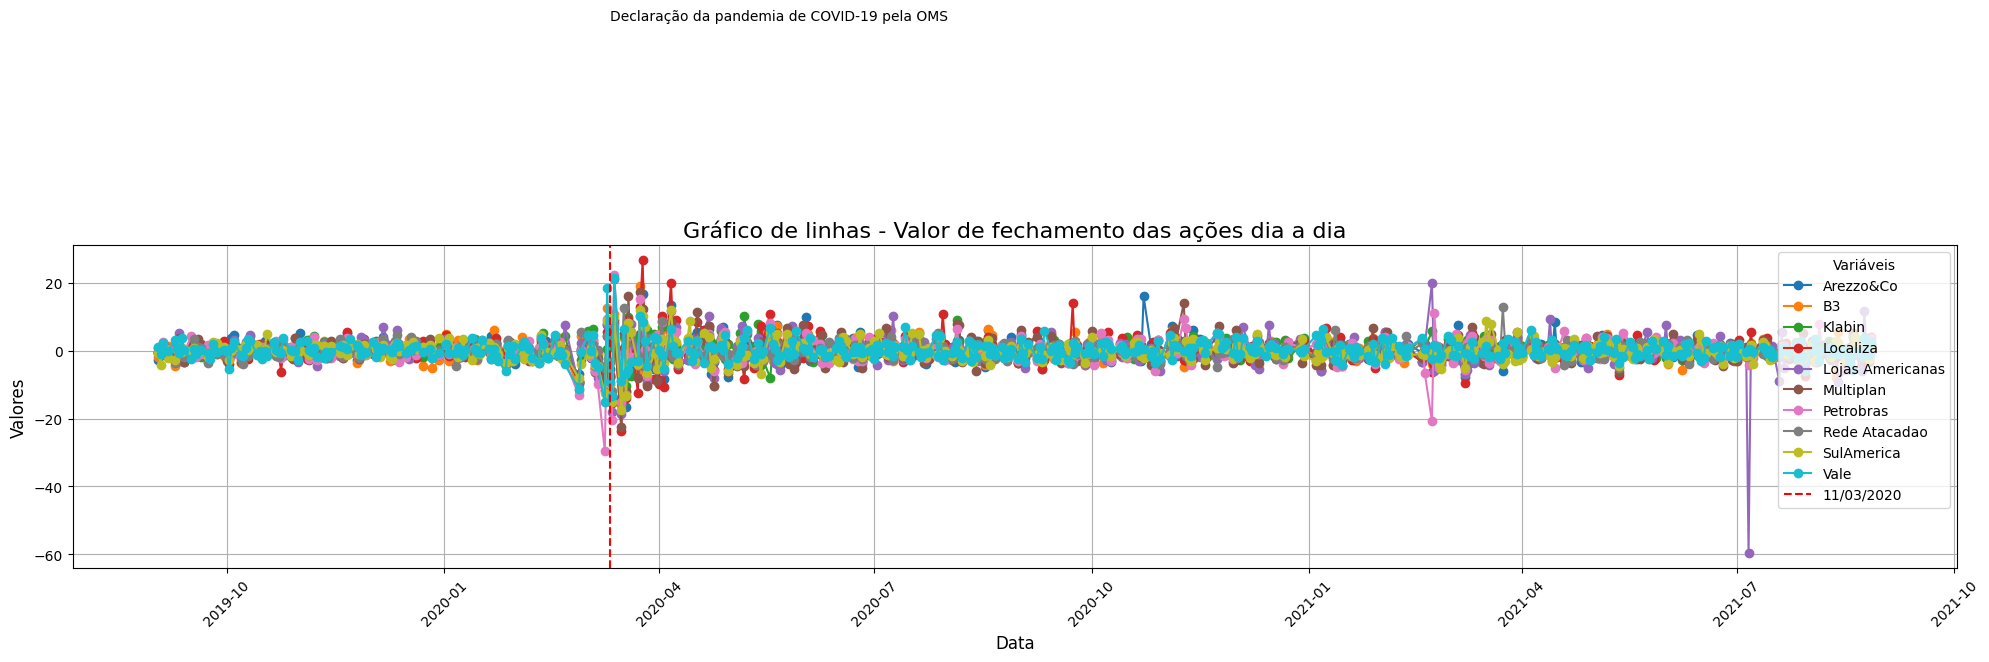

In [16]:
# Configurando o gráfico
plt.figure(figsize=(20, 10))

# Plotando as variáveis
for column in base_retorno.columns[1:]:  # Excluindo a coluna 'Data'
    plt.plot(base_retorno['Data'], base_retorno[column], marker='o', label=column)

# Adicionando uma linha vertical em 11/03/2020
data_destacada = pd.to_datetime("2020-03-11")
plt.axvline(x=data_destacada, color='red', linestyle='--', label='11/03/2020')
plt.text(x = data_destacada, y=base.iloc[:,1].max(), s='Declaração da pandemia de COVID-19 pela OMS', color='black', fontsize=10,va= 'top', ha='left')


# Personalização do gráfico
plt.title("Gráfico de linhas - Valor de fechamento das ações dia a dia", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor visualização
plt.legend(title="Variáveis", loc="best")
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


O gráfico de linhas não foi a melhor escolha para verificarmos a variação do retorno, pois ficou sempre entre o mínimo e o máximo de cada ação. Então vamos usar o Histograma para entender a frequência de cada grupo de percentuais.

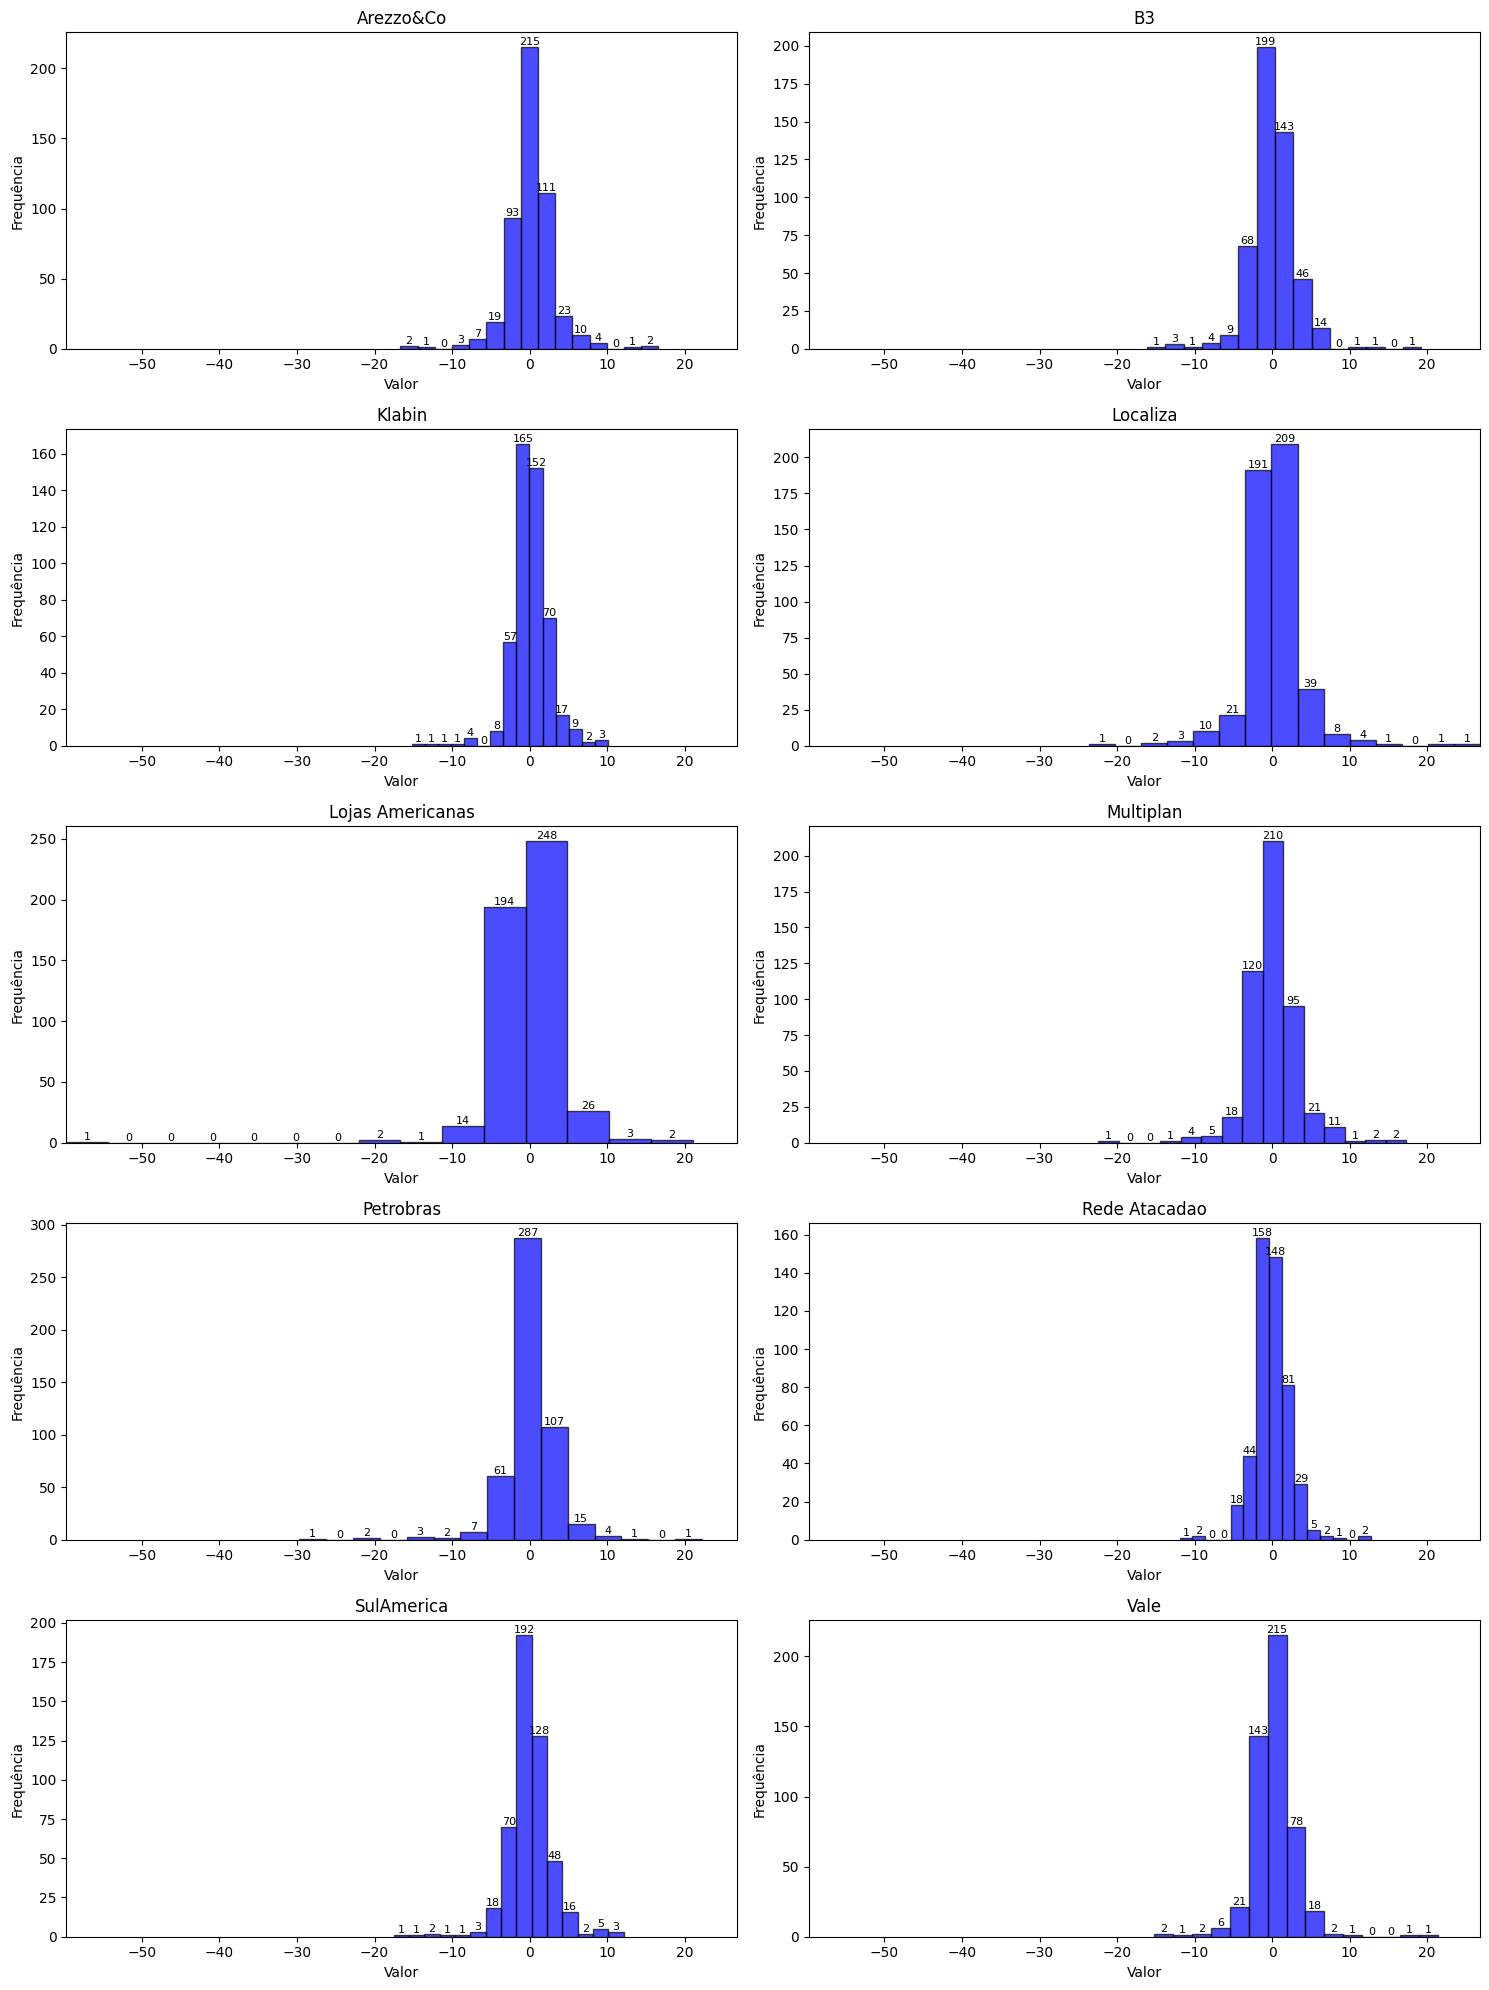

In [17]:
# Criação de histogramas para cada variável
# Excluindo a coluna Data
colunas = [col for col in base_retorno.columns if col != "Data"]

# Encontrando os limites globais do eixo x (mínimo e máximo entre todas as colunas)
x_min = base_retorno[colunas].min().min()
x_max = base_retorno[colunas].max().max()

# Configurando a grade de subplots (2 colunas x 5 linhas para 10 gráficos)
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()  # Transformar os eixos em um array unidimensional para indexação

# Criando histogramas para cada variável
for i, coluna in enumerate(colunas):
    # Plotando o histograma
    n, bins, patches = axes[i].hist(
        base_retorno[coluna], bins=15, color="blue", alpha=0.7, edgecolor="black"
    )
    axes[i].set_title(coluna)
    axes[i].set_xlabel("Valor")
    axes[i].set_ylabel("Frequência")

    # Ajustando os limites do eixo x
    axes[i].set_xlim(x_min, x_max)

    # Adicionando o valor de cada barra acima dela
    for j in range(len(n)):
        axes[i].text(
            (bins[j] + bins[j + 1]) / 2,  # Posição no centro da barra
            n[j],                         # Altura da barra
            f"{int(n[j])}",               # Valor de frequência
            ha="center", va="bottom", fontsize=8, color="black"
        )

# Ajustar o layout e esconder eixos vazios
for ax in axes[len(colunas):]:  # Caso sobrem eixos
    ax.axis("off")

plt.tight_layout()
plt.show()

Pelos gráficos acima de cada ação, vemos que todas elas têm uma, como conhecemos pelas regras da probabilidade, distribuição normal, que é uma distribuição de probabilidade contínua e simétrica que representa o comportamento de um fenômeno natural de forma aleatória.

Ainda em análise dos histogramas, vemos que alguns possuem um espaçamento maior entre as bases, como as ações das Lojas Americanas variando entre menos de -50% a mais de 10%, enquanto a variação da Rede Atacadão vai de aproximadamente -10% a +10%.

Outro ponto importante de analisarmos é a necessidade de criar uma carteira de investimentos para reduzir os riscos de aplicações individuais, onde as ações não estejam relacionadas, para que quando uma aumente, outra diminua, por exemplo.

Para verificarmos a correlação entre as ações, podemos usar uma mais de correlação, onde medimos a correlação de Pearson:

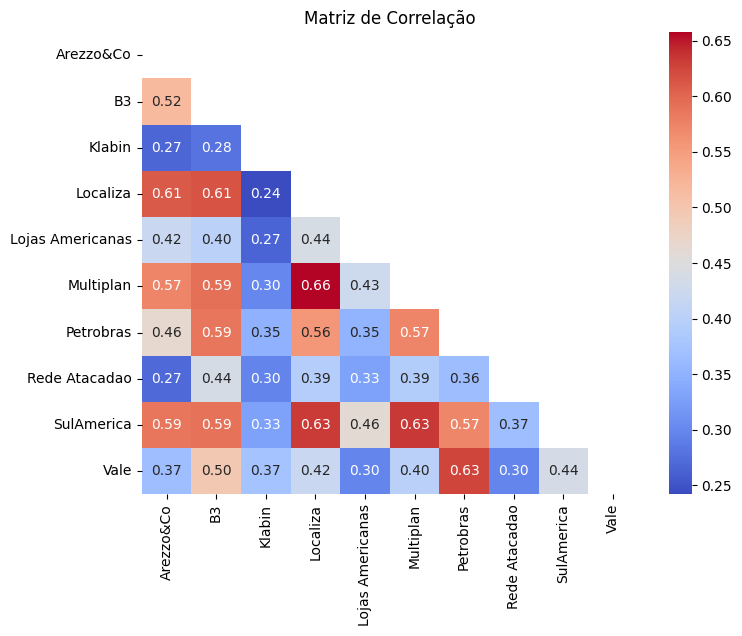

In [18]:
# Selecionando apenas colunas numéricas
base_numerico = base_retorno.select_dtypes(include=['number'])

# Calculando a matriz de correlação
matriz_correlacao = base_numerico.corr(method='pearson')

# Criando uma máscara para a diagonal e valores acima dela
mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool))

# Criando o mapa de calor com a máscara
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_correlacao,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=True
)
plt.title("Matriz de Correlação")
plt.show()

Vemos na matriz acima que a máxima correlação entre as ações é de 63%, ainda considerada como fraca pelo benchmark usado para o coeficiente de Pearson, que é o seguinte:

De -1 a -0,7: Fortemente negativa
Entre -0,69 a 0,69: Fraca
De 0,7 a 1: Fortemente positiva
Vemos que não há ações com correlações fortes entre si, porém é prudente ter cuidado entre algumas delas, com pois maiores valores, como Localiza e Multiplan, por exemplo, 63% de força de correlação entre si.

Dito isso, precisamos também calcular o retorno da carteira e, posteriormente, a volatilidade dela. Para isso, vamos simular a seguinte distribuição das aplicações:

Arezzo&Co - 10%
B3 - 10%
Klabin - 10%
Localiza - 10%
Lojas Americanas - 5%
Multiplan - 10%
Petrobras - 10%
Rede Atacadao - 10%
SulAmerica - 10%
Vale - 15%
Para calcularmos o retorno da carteira, basta calcularmos a média ponderada de cada ação pelo seu peso, ou seja, por qual percentual foi aplicado em cada uma delas.

In [19]:
# Pesos das variáveis
pesos = {
    "Arezzo&Co": 0.10,
    "B3": 0.10,
    "Klabin": 0.10,
    "Localiza": 0.10,
    "Lojas Americanas": 0.05,
    "Multiplan": 0.10,
    "Petrobras": 0.10,
    "Rede Atacadao": 0.10,
    "SulAmerica": 0.10,
    "Vale": 0.15
}

# Verificando se todas as colunas estão no DataFrame
colunas_necessarias = list(pesos.keys())
colunas_disponiveis = [col for col in colunas_necessarias if col in base_retorno.columns]

# Filtrando os pesos para as colunas existentes
pesos_filtrados = {col: pesos[col] for col in colunas_disponiveis}

# Criando a coluna Retorno da carteira (média ponderada)
base_retorno["Retorno da carteira"] = base_retorno[colunas_disponiveis].mul(
    list(pesos_filtrados.values()), axis=1
).sum(axis=1)

# Visualizando o dataframe atualizado
base_retorno

,Data,Arezzo&Co,B3,Klabin,Localiza,Lojas Americanas,Multiplan,Petrobras,Rede Atacadao,SulAmerica,Vale,Retorno da carteira
0,2021-08-27,1.171703,2.049780,1.327258,4.181558,0.000000,1.945895,3.637686,1.626011,1.024587,2.504325,2.072097
1,2021-08-26,-1.414225,-2.358828,-1.124856,-2.729011,2.409639,-3.348619,-0.865489,-2.329264,-2.399997,-1.276379,-1.728004
2,2021-08-25,0.970132,0.647482,3.895598,0.841367,-1.022147,-0.592800,0.543872,0.105978,-0.859220,-0.210610,0.472542
3,2021-08-24,1.650967,1.831502,1.986492,1.098705,11.809524,3.151458,2.072539,0.372351,3.206003,3.648651,2.674775
4,2021-08-23,-0.165931,-3.873239,2.275494,-3.916227,-6.082290,-2.027654,1.578947,-2.134305,-1.112985,-1.383912,-1.449291
...,...,...,...,...,...,...,...,...,...,...,...,...
486,2019-09-06,-0.908524,1.324503,0.066711,-0.888893,-1.211796,-1.016187,0.492615,-1.418124,-2.042549,-0.150471,-0.522205
487,2019-09-05,0.707008,1.501237,-0.728477,0.148366,-0.315125,1.026620,0.495046,-1.085968,0.427349,0.000000,0.233362
488,2019-09-04,1.029416,2.011426,2.027027,1.331617,2.200757,0.998456,2.578125,-0.180664,1.408457,2.196837,1.559949
489,2019-09-03,-1.244819,-0.432406,-1.135605,-0.724941,0.161287,-0.610687,1.185775,-0.494387,-4.193488,-1.064982,-0.916739


In [20]:
# Calculando a volatilidade de cada ação
volatilidade = base_retorno.drop(columns='Data').std()
volatilidade.name = 'Volatilidade'
volatilidade = volatilidade.sort_values(ascending=False)
volatilidade

Lojas Americanas       4.413699
Localiza               3.724152
Petrobras              3.573689
Multiplan              3.354972
Arezzo&Co              3.004598
B3                     2.932131
SulAmerica             2.887164
Vale                   2.856916
Klabin                 2.445055
Rede Atacadao          2.291600
Retorno da carteira    2.203201
Name: Volatilidade, dtype: float64

Vemos acima que a volatilidade da carteira é menor que até que a da ação com menor desvio padrão, ou seja, o risco de perda é bem menor ao se distribuir a aplicação em várias aplicações não correlacionadas.

## Desenvolvimento do estudo analítico

Na seção anterior, vimos que a melhor forma de analisarmos a viabilidade da técnica do VaR é pela carteira de investimentos, pois ela nos gera menor risco que as demais.

Mas a pergunta continua que ainda não respondemos é "o que é o VaR?"

Como dito na seção de objetivos, ele é calculado encontrando os 5% menores valores de retorno da aplicação e multiplicando este valor pelo valor investido.

Em um exemplo básico, se o valor máximo dos 5% menores valores de uma aplicação for de -2%, podemos dizer que se a aplicação foi de 10.000 reais, o VaR é de 10.000 * -0,2%, que será de -20 reais, ou seja, nos 5% piores dias, a posição gerou prejuízo de pelo menos 20 reais.

Desta forma, vamos calcular o VaR da carteira, e vamos considerar uma aplicação de 1.000.000 (um milhão) de reais.



In [21]:
# Passo 1: Calcular o valor máximo dos 5% menores valores (5% quantil)
var_5_percent = base_retorno["Retorno da carteira"].quantile(0.05)

print(f"VaR baseado nos 5% menores valores: {var_5_percent:.4f}")

# Passo 2: Multiplicar o valor da aplicação pelo valor calculado
valor_aplicacao = 1_000_000  # R$ 1.000.000
var_aplicacao = valor_aplicacao * var_5_percent / 100

print(f"VaR em reais para a aplicação de R$ {valor_aplicacao:,.2f}: R$ {var_aplicacao:,.2f}")

VaR baseado nos 5% menores valores: -2.4431
VaR em reais para a aplicação de R$ 1,000,000.00: R$ -24,431.06


Vimos acima que o valor máximo dos 5% piores dias da carteira foi um valor de - 2,44%, o que nos diz que para o investimento de 1.000.000 de reais que estipulamos, a perda nesses piores dias será de, no mínimo, 24.431,06 reais, sendo superior a isso nos outros 95% dos dias.

## Validação do estudo

Até agora, vimos como o VaR funciona, vimos como as ações de comportam, mas de fato a técnica é funcional para o mercado financeiro?

Para entendemos se ela é funcional, precisamos seguir para o backtesting, um processo de testagem de modelos matemáticos que utiliza séries temporais para precisar o comportamento de sistemas dinâmicos.

Neste caso, vamos verificar o que o VaR previu e o quanto ele acertou utilizando nossos dados históricos, onde os dados entre 31/08/2020 e 28/02/2021 serão os dados previstos e o período seguinte, 01/03/2021 a 27/08/2021, será a nossa confirmação da previsão.

Assim, vamos iniciar separando o período de previsão e calculando o VaR de nossa carteira.

In [22]:
# Passo 1: Filtrar o DataFrame entre as datas
data_inicial = "2020-08-31"
data_final = "2021-02-28"

# Filtrar as datas
base_retorno_previsao = base_retorno[
    (base_retorno["Data"] >= data_inicial) & (base_retorno["Data"] <= data_final)
]

# Mostrar o DataFrame filtrado
base_retorno_previsao

,Data,Arezzo&Co,B3,Klabin,Localiza,Lojas Americanas,Multiplan,Petrobras,Rede Atacadao,SulAmerica,Vale,Retorno da carteira
126,2021-02-26,-1.369103,-1.074868,-0.366908,-3.107252,-4.229143,-1.992032,-4.096597,-3.404472,-5.355098,-1.243341,-2.474591
127,2021-02-25,-3.017704,-1.312492,-4.033291,-1.123224,-2.218045,1.056865,-4.959012,-0.606056,-4.013197,-2.266926,-2.251752
128,2021-02-24,-1.022174,0.505967,1.329873,-1.239801,-2.313625,-1.144274,1.413138,-2.606990,0.664086,1.010833,-0.174074
129,2021-02-23,-2.523288,-0.717616,-0.226537,0.343753,-5.941281,-0.198605,11.029068,0.395062,-1.659859,1.678027,0.598838
130,2021-02-22,0.363635,-3.979328,5.713308,-6.159751,19.875781,-2.564107,-20.709843,-1.984511,-0.729338,-2.475196,-2.382484
...,...,...,...,...,...,...,...,...,...,...,...,...
239,2020-09-04,1.134612,0.882048,-0.358566,0.118369,-0.064808,2.676511,0.174830,-0.626501,0.410021,1.972357,0.733745
240,2020-09-03,-2.054220,-3.585128,-1.142178,-0.705191,-5.221135,-1.275631,0.350877,1.120858,-0.611279,-3.261579,-1.540483
241,2020-09-02,0.883302,-0.133219,-2.683024,1.289677,-1.333333,-0.543720,-0.306087,1.584153,-0.045253,-0.712432,-0.168948
242,2020-09-01,4.900214,2.125847,1.320388,4.499278,2.262160,6.003842,4.476939,3.324819,1.237110,3.485251,3.424739


In [23]:
# Passo 2: Calcular o valor máximo dos 5% menores valores na coluna 'Retorno da carteira'
var_5_percent_previsao = base_retorno_previsao["Retorno da carteira"].quantile(0.05)

# Passo 3: Multiplicar pelo valor da aplicação
valor_aplicacao = 1_000_000 # R$ 1.000.000
var_aplicacao_previsao = (valor_aplicacao * var_5_percent_previsao) / 100

# Resultados
print(f"\nVaR (5% menores valores) para o intervalo de datas: {var_5_percent_previsao:.4f}")
print(f"VaR em reais para a aplicação de R$ {valor_aplicacao:,.2f}: R$ {var_aplicacao_previsao:,.2f}")


VaR (5% menores valores) para o intervalo de datas: -2.3963
VaR em reais para a aplicação de R$ 1,000,000.00: R$ -23,963.00


Agora, vamos fazer o mesmo para o período de confirmação:

In [24]:
# Passo 1: Filtrar o DataFrame entre as datas
data_inicial = "2021-03-01"
data_final = "2021-08-27"

# Filtrar as datas
base_retorno_confirmacao = base_retorno[
    (base_retorno["Data"] >= data_inicial) & (base_retorno["Data"] <= data_final)
]

# Mostrar o DataFrame filtrado
base_retorno_confirmacao

,Data,Arezzo&Co,B3,Klabin,Localiza,Lojas Americanas,Multiplan,Petrobras,Rede Atacadao,SulAmerica,Vale,Retorno da carteira
0,2021-08-27,1.171703,2.049780,1.327258,4.181558,0.000000,1.945895,3.637686,1.626011,1.024587,2.504325,2.072097
1,2021-08-26,-1.414225,-2.358828,-1.124856,-2.729011,2.409639,-3.348619,-0.865489,-2.329264,-2.399997,-1.276379,-1.728004
2,2021-08-25,0.970132,0.647482,3.895598,0.841367,-1.022147,-0.592800,0.543872,0.105978,-0.859220,-0.210610,0.472542
3,2021-08-24,1.650967,1.831502,1.986492,1.098705,11.809524,3.151458,2.072539,0.372351,3.206003,3.648651,2.674775
4,2021-08-23,-0.165931,-3.873239,2.275494,-3.916227,-6.082290,-2.027654,1.578947,-2.134305,-1.112985,-1.383912,-1.449291
...,...,...,...,...,...,...,...,...,...,...,...,...
121,2021-03-05,7.520545,1.802130,3.245239,-0.147728,-2.605859,4.701268,0.765077,0.979381,3.772413,1.365565,2.338374
122,2021-03-04,2.961915,-1.943808,-0.763619,3.570211,2.718524,2.871537,4.860774,3.246402,-0.736647,-1.484800,1.319883
123,2021-03-03,-1.294724,1.035528,-1.213509,0.375430,-1.402062,0.303178,-3.638013,-0.634580,-1.332531,-1.230315,-0.894572
124,2021-03-02,0.884839,3.054276,-1.326861,-0.946589,-1.742301,2.115594,-0.045455,-0.786983,0.242875,3.073956,0.693148


In [25]:
# Passo 2: Calcular o valor máximo dos 5% menores valores na coluna 'Retorno da carteira'
var_5_percent_confirmacao = base_retorno_confirmacao["Retorno da carteira"].quantile(0.05)

# Passo 3: Multiplicar pelo valor da aplicação
valor_aplicacao = 1_000_000 # R$ 1.000.000
var_aplicacao_confirmacao = (valor_aplicacao * var_5_percent_confirmacao) / 100

# Resultados
print(f"\nVaR (5% menores valores) para o intervalo de datas: {var_5_percent_confirmacao:.4f}")
print(f"VaR em reais para a aplicação de R$ {valor_aplicacao:,.2f}: R$ {var_aplicacao_confirmacao:,.2f}")


VaR (5% menores valores) para o intervalo de datas: -1.8098
VaR em reais para a aplicação de R$ 1,000,000.00: R$ -18,098.47


In [26]:
# Criando o DataFrame
bkt_var = pd.DataFrame(
    {
        "Previsão": [var_5_percent_previsao, var_aplicacao_previsao],
        "Confirmação": [var_5_percent_confirmacao, var_aplicacao_confirmacao],
    },
    index=["VaR", "VaR (R$)"]
)

# Exibindo o DataFrame
bkt_var

,Previsão,Confirmação
VaR,-2.396300,-1.809847
VaR (R$),-23962.999934,-18098.467756


Na carteira que utilizamos, vimos que a previsão foi de que em 5% dos dias previstos, ou seja, em aproximadamente 6 dias, teríamos uma perda de pelo menos 23.963,00 reais, e quando vimos na confirmação, ou seja, no período de 126 dias seguintes, tivemos nos 5% piores dias uma perda de 18.098,47 reais, um cenário até melhor do que o previsto, e é o que esperamos em uma aplicação.

Agora, vamos fazer reitor o processo com a mesma base, porém utilizando todo o período, dividindo-o igualmente.

In [27]:
# Passo 1: Filtrar o DataFrame entre as datas
data_inicial = "2019-08-31"
data_final = "2020-08-29"

# Filtrar as datas
base_retorno_previsao2 = base_retorno[
    (base_retorno["Data"] >= data_inicial) & (base_retorno["Data"] <= data_final)
]

# Mostrar o DataFrame filtrado
base_retorno_previsao2

,Data,Arezzo&Co,B3,Klabin,Localiza,Lojas Americanas,Multiplan,Petrobras,Rede Atacadao,SulAmerica,Vale,Retorno da carteira
244,2020-08-28,4.124091,1.227611,0.345092,1.812256,2.626699,0.511633,1.760727,1.907216,1.541249,0.509947,1.530815
245,2020-08-27,1.163007,-0.363640,-0.381971,1.425037,0.747204,-0.046490,-0.315027,1.041661,-1.297542,-1.554654,-0.073334
246,2020-08-26,0.314811,-2.182705,0.191355,-1.525320,-2.666670,-0.554780,-2.842160,-3.030293,-1.866077,0.210972,-1.251205
247,2020-08-25,1.886792,1.559941,-1.693006,0.265084,0.609751,-2.082395,-0.435342,2.272717,-0.675969,-2.128335,-0.178981
248,2020-08-24,-0.375942,-0.114819,1.800073,0.142945,-0.666257,-0.270880,1.817376,-0.154709,-0.735929,1.221862,0.360778
...,...,...,...,...,...,...,...,...,...,...,...,...
486,2019-09-06,-0.908524,1.324503,0.066711,-0.888893,-1.211796,-1.016187,0.492615,-1.418124,-2.042549,-0.150471,-0.522205
487,2019-09-05,0.707008,1.501237,-0.728477,0.148366,-0.315125,1.026620,0.495046,-1.085968,0.427349,0.000000,0.233362
488,2019-09-04,1.029416,2.011426,2.027027,1.331617,2.200757,0.998456,2.578125,-0.180664,1.408457,2.196837,1.559949
489,2019-09-03,-1.244819,-0.432406,-1.135605,-0.724941,0.161287,-0.610687,1.185775,-0.494387,-4.193488,-1.064982,-0.916739


In [28]:
# Passo 2: Calcular o valor máximo dos 5% menores valores na coluna 'Retorno da carteira'
var_5_percent_previsao2 = base_retorno_previsao2["Retorno da carteira"].quantile(0.05)

# Passo 3: Multiplicar pelo valor da aplicação
valor_aplicacao = 1_000_000 # R$ 1.000.000
var_aplicacao_previsao2 = (valor_aplicacao * var_5_percent_previsao2) / 100

# Resultados
print(f"\nVaR (5% menores valores) para o intervalo de datas: {var_5_percent_previsao2:.4f}")
print(f"VaR em reais para a aplicação de R$ {valor_aplicacao:,.2f}: R$ {var_aplicacao_previsao2:,.2f}")


VaR (5% menores valores) para o intervalo de datas: -3.5880
VaR em reais para a aplicação de R$ 1,000,000.00: R$ -35,879.66


In [29]:
# Passo 1: Filtrar o DataFrame entre as datas
data_inicial = "2020-08-30"
data_final = "2021-08-27"

# Filtrar as datas
base_retorno_confirmacao2 = base_retorno[
    (base_retorno["Data"] >= data_inicial) & (base_retorno["Data"] <= data_final)
]

# Mostrar o DataFrame filtrado
base_retorno_confirmacao2

,Data,Arezzo&Co,B3,Klabin,Localiza,Lojas Americanas,Multiplan,Petrobras,Rede Atacadao,SulAmerica,Vale,Retorno da carteira
0,2021-08-27,1.171703,2.049780,1.327258,4.181558,0.000000,1.945895,3.637686,1.626011,1.024587,2.504325,2.072097
1,2021-08-26,-1.414225,-2.358828,-1.124856,-2.729011,2.409639,-3.348619,-0.865489,-2.329264,-2.399997,-1.276379,-1.728004
2,2021-08-25,0.970132,0.647482,3.895598,0.841367,-1.022147,-0.592800,0.543872,0.105978,-0.859220,-0.210610,0.472542
3,2021-08-24,1.650967,1.831502,1.986492,1.098705,11.809524,3.151458,2.072539,0.372351,3.206003,3.648651,2.674775
4,2021-08-23,-0.165931,-3.873239,2.275494,-3.916227,-6.082290,-2.027654,1.578947,-2.134305,-1.112985,-1.383912,-1.449291
...,...,...,...,...,...,...,...,...,...,...,...,...
239,2020-09-04,1.134612,0.882048,-0.358566,0.118369,-0.064808,2.676511,0.174830,-0.626501,0.410021,1.972357,0.733745
240,2020-09-03,-2.054220,-3.585128,-1.142178,-0.705191,-5.221135,-1.275631,0.350877,1.120858,-0.611279,-3.261579,-1.540483
241,2020-09-02,0.883302,-0.133219,-2.683024,1.289677,-1.333333,-0.543720,-0.306087,1.584153,-0.045253,-0.712432,-0.168948
242,2020-09-01,4.900214,2.125847,1.320388,4.499278,2.262160,6.003842,4.476939,3.324819,1.237110,3.485251,3.424739


In [30]:
# Passo 2: Calcular o valor máximo dos 5% menores valores na coluna 'Retorno da carteira'
var_5_percent_confirmacao2 = base_retorno_confirmacao2["Retorno da carteira"].quantile(0.05)

# Passo 3: Multiplicar pelo valor da aplicação
valor_aplicacao = 1_000_000 # R$ 1.000.000
var_aplicacao_confirmacao2 = (valor_aplicacao * var_5_percent_confirmacao2) / 100

# Resultados
print(f"\nVaR (5% menores valores) para o intervalo de datas: {var_5_percent_confirmacao2:.4f}")
print(f"VaR em reais para a aplicação de R$ {valor_aplicacao:,.2f}: R$ {var_aplicacao_confirmacao2:,.2f}")


VaR (5% menores valores) para o intervalo de datas: -2.3305
VaR em reais para a aplicação de R$ 1,000,000.00: R$ -23,305.01


In [31]:
# Criando o DataFrame
bkt_var2 = pd.DataFrame(
    {
        "Previsão": [var_5_percent_previsao2, var_aplicacao_previsao2],
        "Confirmação": [var_5_percent_confirmacao2, var_aplicacao_confirmacao2],
    },
    index=["VaR", "VaR (R$)"]
)

# Exibindo o DataFrame
bkt_var2

,Previsão,Confirmação
VaR,-3.587966,-2.330501
VaR (R$),-35879.657335,-23305.009563


Aplicando a técnica a todo o período levantado, percebemos que o mesmo acontece, mesmo tendo o cisne negro da pandemia no meio tempo, em que o VaR previsão foi de uma perda de 35.879,66 reais nos 5% piores dias contra uma perda de 23.305,01 reais nos 5% piores dias do período usado para confirmação.

## Verificação dos critérios de sucesso

Pelo exposto, vimos que a técnica do VaR é eficiente para prever o risco de uma ação ou carteira de ações de investimentos, porém podem ocorrer os Cisnes Negros, o que atrapalha qualquer previsão.

Por sorte, Cisnes Negros ocorrem de forma rara, então podem ser levados em consideração no estudo, mas não chegam a invalidar a técnica do VaR.

## Conclusão

 A Limitação da Análise de VaR
 
Embora o VaR seja uma ferramenta útil para estimar o risco de perdas potenciais em uma carteira, é importante observar as críticas de especialistas, como Nassim Taleb, sobre sua dependência de dados históricos e a suposição de que os padrões de risco passados se repetirão. O VaR pode subestimar o risco de eventos extremos (Cisnes Negros), como a pandemia de COVID-19. Portanto, embora o VaR forneça uma estimativa de risco em um intervalo de confiança de 95%, ele não é capaz de capturar completamente os riscos associados a eventos imprevisíveis e altamente impactantes.

 Estratégia de Diversificação como Mitigadora de Riscos
 
A redução do risco e do VaR demonstrada na carteira diversificada confirma que uma estratégia eficaz de diversificação pode reduzir significativamente a exposição a riscos, equilibrando o portfólio. No caso específico do cenário abordado neste estudo, a diversificação ajudou a diminuir o risco total e a proteger a carteira contra perdas extremas, oferecendo um bom equilíbrio entre segurança e retorno. Portanto, para investidores que buscam uma gestão de risco eficiente, é essencial incorporar essa estratégia de diversificação em suas carteiras.

Relevância das Análises para Tomada de Decisão

A análise do risco e do VaR é essencial para embasar decisões de investimento mais informadas. A compreensão do impacto da correlação entre os ativos e a aplicação de cálculos como o VaR ajudam os investidores a gerenciar melhor o risco de suas carteiras e alinhar seus investimentos aos seus objetivos de risco e retorno. Com a utilização desses métodos quantitativos, os gestores de portfólio podem tomar decisões mais estratégicas e ajustar suas carteiras conforme as condições de mercado.

O VaR e as Limitações na Gestão de Risco

A metodologia VaR não leva em conta a magnitude de perdas além do valor calculado. Isso significa que, em cenários de eventos extremos (como uma crise financeira global ou eventos imprevisíveis como a pandemia), o VaR pode não fornecer uma estimativa precisa do risco real. É essencial que investidores e gestores de portfólio complementem o VaR com outras métricas e técnicas de gestão de risco, como o Stress Testing e a Análise de Cenários, para ter uma visão mais completa do risco associado a sua carteira.

Recomendação para Melhoria de Gestão de Risco

A diversificação é uma estratégia fundamental para reduzir o risco, mas ela deve ser realizada de forma estratégica, considerando as correlações entre os ativos e os setores. Para otimizar a gestão de risco, seria interessante combinar o VaR com outras metodologias, como o Conditional VaR (CVaR), que oferece uma estimativa mais precisa do risco de perdas extremas, além de simulações de Monte Carlo, para avaliar uma gama mais ampla de cenários possíveis. Além disso, monitorar constantemente as correlações entre os ativos pode permitir ajustes rápidos e eficazes na composição da carteira.

A análise de risco e VaR realizada neste estudo confirmou a eficácia da diversificação como estratégia para reduzir o risco global e limitar as perdas potenciais em uma carteira de investimentos. Apesar das limitações do VaR, como sua incapacidade de prever eventos extremos, essa ferramenta permanece um recurso valioso para medir e monitorar o risco. A combinação de diversificação com o uso de técnicas avançadas de análise de risco proporciona uma gestão mais robusta da carteira e um melhor alinhamento com os objetivos financeiros do investidor.


